In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import requests
import json
from PIL import Image
from urllib.request import urlopen
from mplsoccer import Pitch, add_image, FontManager
import ScraperFC as sfc
Sofascore = sfc.Sofascore()

In [3]:
r = requests.get('https://webws.365scores.com/web/game/?appTypeId=5&langId=29&timezoneName=America/Asuncion&userCountryId=108&gameId=4039750&matchupId=7739-8548-621')

In [4]:
partido = r.json()

In [5]:
partido.keys()

dict_keys(['lastUpdateId', 'requestedUpdateId', 'ttl', 'game', 'sports', 'countries', 'competitions'])

In [6]:
partido['game']['awayCompetitor'].keys()

dict_keys(['id', 'countryId', 'sportId', 'name', 'score', 'isQualified', 'toQualify', 'isWinner', 'type', 'recentMatches', 'lineups', 'statistics', 'nameForURL', 'imageVersion', 'color', 'mainCompetitionId'])

## FORMACION

In [7]:
df_local = Sofascore.get_players_match_stats('https://www.sofascore.com/es/olimpia-guarani/UucsXuc#11903715')[0]

In [8]:
Local_subtituto = df_local[df_local['substitute'] == True]

In [9]:
Local_titular = df_local[df_local['substitute'] == False]

In [10]:
jugadores_suplentes_local = Local_subtituto['name'].to_string(index=False, header=False)

In [11]:
jugadores_titulares_local = Local_titular['name'].to_string(index=False, header=False)

In [12]:
df_visit = Sofascore.get_players_match_stats('https://www.sofascore.com/es/olimpia-guarani/UucsXuc#11903715')[1]
visit_subtituto = df_visit[df_visit['substitute'] == True]
visit_titular = df_visit[df_visit['substitute'] == False]
jugadores_suplentes_visit = visit_subtituto['name'].to_string(index=False, header=False)
jugadores_titulares_visit = visit_titular['name'].to_string(index=False, header=False)

### ----------------------------------------------------------------------------------------------------------------------

### Nombre de los equipos

In [13]:
nombre_local = partido['game']['homeCompetitor']['name']
nombre_visit = partido['game']['awayCompetitor']['name']

### Logos

In [14]:
idLocal = partido['game']['homeCompetitor']['id']
idVisit = partido['game']['awayCompetitor']['id']

In [15]:
imagen1 = Image.open(urlopen(f'https://imagecache.365scores.com/image/upload/f_png,w_64,h_64,c_limit,q_auto:eco,dpr_2,d_Competitors:default1.png/v3/Competitors/{idLocal}'))
imagen2 = Image.open(urlopen(f'https://imagecache.365scores.com/image/upload/f_png,w_64,h_64,c_limit,q_auto:eco,dpr_2,d_Competitors:default1.png/v3/Competitors/{idVisit}'))

### Header

In [16]:
goles_local = int(partido['game']['homeCompetitor']['score'])
goles_visit = int(partido['game']['awayCompetitor']['score'])

In [17]:
torneo = partido['game']['competitionDisplayName']
fecha = partido['game']['roundNum']

In [18]:
formacion_localNum = partido['game']['homeCompetitor']['lineups']['formation']

### partido['game']['awayCompetitor']['lineups']['members']

### Fuentes

In [20]:
fuente1 = FontManager('https://github.com/google/fonts/blob/main/ofl/poppins/Poppins-Regular.ttf?raw=true')
fuente2 = FontManager('https://github.com/google/fonts/blob/main/ofl/poppins/Poppins-BoldItalic.ttf?raw=true')
fuente3 = FontManager('https://github.com/google/fonts/blob/main/ofl/poppins/Poppins-BoldItalic.ttf?raw=true')

In [21]:
def sacar_spines(ax):
    ax.spines[['top','right','bottom','left']].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

### Estadisticas ataque

In [22]:
estadistica_v = pd.DataFrame(partido['game']['homeCompetitor']['statistics'])
estadistica_visit = estadistica_v.drop(index=4).reset_index(drop=True)

estadistica_l = pd.DataFrame(partido['game']['homeCompetitor']['statistics'])
estadistica_local = estadistica_l.drop(index=4).reset_index(drop=True)

In [23]:
stats_visit = estadistica_visit['value'].to_string(index=False, header=False)
info = estadistica_local['name'].to_string(index=False)
stats_local = estadistica_local['value'].to_string(index=False, header=False)

### Grafico

"ax13 = fig.add_subplot(gs[3:,2:4])\nax13.set_title('[3:,2:4]')"

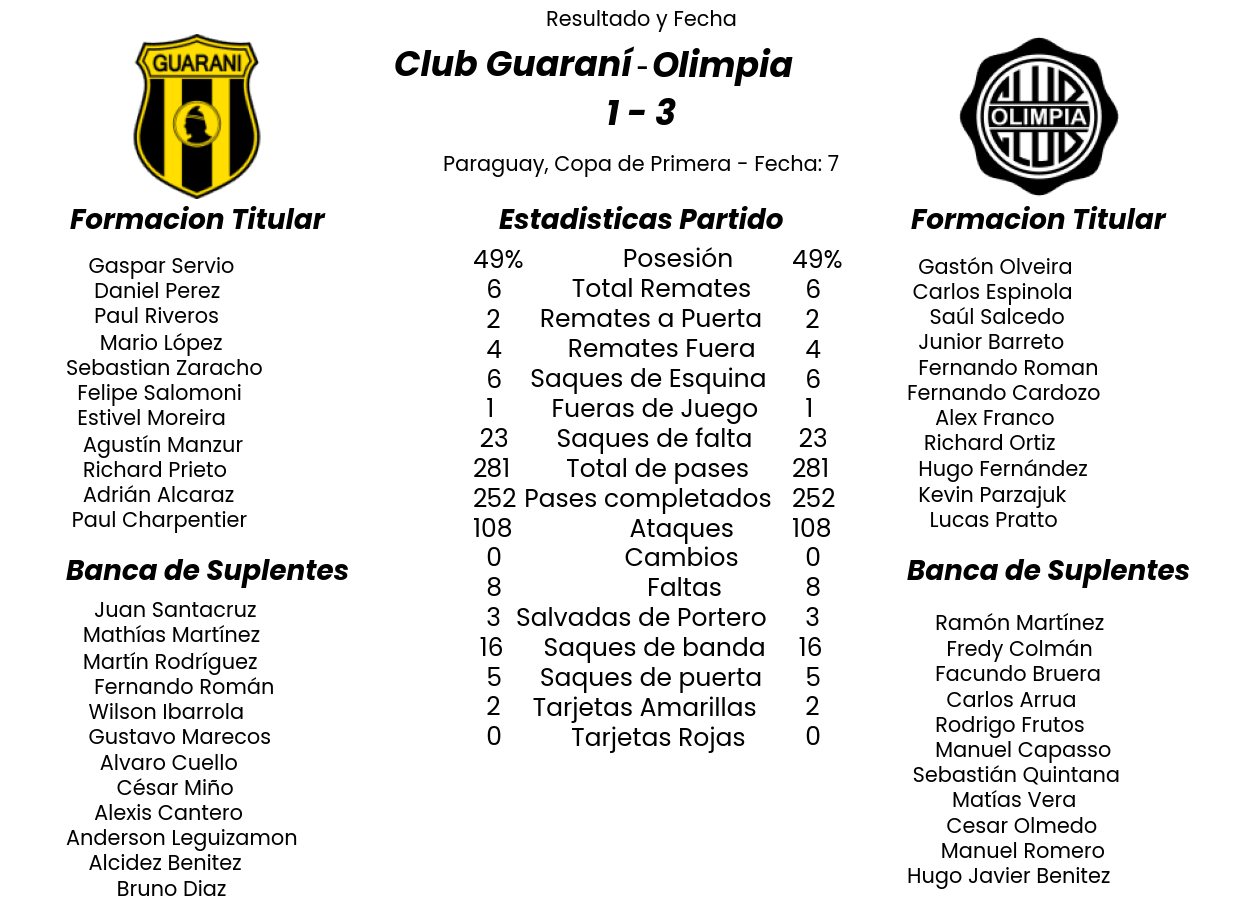

In [35]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=4)
fig.set_facecolor('white')

#Escudo Local
ax1 = fig.add_subplot(gs[0,0:1])
ax1.set_title('')
ax1.imshow(imagen1)
sacar_spines(ax1)

#Escudo Visitante
ax2 = fig.add_subplot(gs[0,2:3])
#ax2.set_title('[0,:2]')
ax2.imshow(imagen2)
sacar_spines(ax2)


ax3 = fig.add_subplot(gs[0,1:2])
ax3.set_title('Resultado y Fecha', fontproperties=fuente1.prop, size = 15)
ax3.text(.475,.8,f'{nombre_local}', ha='right', va='center', fontproperties=fuente2.prop, size = 25)
ax3.text(.525,.8,f'{nombre_visit}', ha='left', va='center', fontproperties=fuente2.prop, size = 25)
ax3.text(.5,.8,'-', size = 25, ha='center', va='center')
ax3.text(.5,.5,f'{goles_local} - {goles_visit}', ha='center', va='center', fontproperties=fuente2.prop, size = 25)
ax3.text(.5,.2,f'{torneo} - Fecha: {fecha}', ha='center', va='center', fontproperties=fuente1.prop, size = 15)
sacar_spines(ax3)

 
"""ax3 = fig.add_subplot(gs[0,3:4])
ax3.set_title('[0,3:4]')

ax4 = fig.add_subplot(gs[0,4:5])
ax4.set_title('[0,4:5]')"""

"""ax5 = fig.add_subplot(gs[0,5:])
ax5.set_title('[0,5:]')"""

ax6 = fig.add_subplot(gs[1:,:1])
ax6.text(.15,.76, f'{jugadores_titulares_local}', ha='left', va='center', fontproperties=fuente1.prop, size = 15)
ax6.set_title('Formacion Titular',fontproperties=fuente2.prop, size = 20, ha='center', va='center')
ax6.text(.15,.22, f'{jugadores_suplentes_local}', ha='left', va='center', fontproperties=fuente1.prop, size = 15)
ax6.text(.15,.48,'Banca de Suplentes',fontproperties=fuente2.prop, size = 20)
sacar_spines(ax6)

ax7 = fig.add_subplot(gs[1:,1:2])
ax7.set_title('Estadisticas Partido',fontproperties=fuente2.prop , size = 20)
ax7.text(0.05,0.60, f'{stats_local}', ha='left', va='center', fontproperties=fuente1.prop, size = 18)
ax7.text(0.50,0.60, f'{info}', ha='center', va='center', fontproperties=fuente1.prop, size = 18)
ax7.text(0.90,0.60, f'{stats_visit}', ha='left', va='center', fontproperties=fuente1.prop, size = 18)
sacar_spines(ax7)

ax8 = fig.add_subplot(gs[1:,2:3])
ax8.text(.15,.76, f'{jugadores_titulares_visit}', ha='left', va='center', fontproperties=fuente1.prop, size = 15)
ax8.set_title('Formacion Titular',fontproperties=fuente2.prop, size = 20, ha='center', va='center')
ax8.text(.15,.22, f'{jugadores_suplentes_visit}', ha='left', va='center', fontproperties=fuente1.prop, size = 15)
ax8.text(.15,.48,'Banca de Suplentes',fontproperties=fuente2.prop, size = 20)
sacar_spines(ax8)

plt.savefig('estadisticas.png', dpi=300, bbox_inches='tight')

"""ax8 = fig.add_subplot(gs[1:3,5:])
ax8.set_title('[1:3,5:]')"""

"""ax9 = fig.add_subplot(gs[4:,0:2])
ax9.set_title('[4:,0:2]')"""

"""ax10 = fig.add_subplot(gs[4:,5:])
ax10.set_title('[4:,5:]')"""

"""ax11 = fig.add_subplot(gs[3:4,0:2])
ax11.set_title('[3:4,0:2]')"""

"""ax12 = fig.add_subplot(gs[3:4,5:])
ax12.set_title('[3:4,5:]')"""

"""ax13 = fig.add_subplot(gs[3:,2:4])
ax13.set_title('[3:,2:4]')"""